In [83]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="darkgrid")

import matplotlib.pyplot as plt


SMALL_SIZE  = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [84]:
SERIES_TOTAL = 'Emissions (thousand metric tons of carbon dioxide)'
SERIES_PER_CAPITA = 'Emissions per capita (metric tons of carbon dioxide)'
FIG_SIZE_2 = (20, 6)


In [85]:
def column_properties(df):
    columns_prop = pd.DataFrame()
    columns_prop['column'] = df.columns.tolist()
    columns_prop['count_non_null'] = df.count().values
    columns_prop['count_null'] = df.isnull().sum().values
    columns_prop['perc_null'] = columns_prop['count_null'] * 100 / df.shape[0]

    #using df.nunique() is memory intensive and slow resulting in kernal death
    unique_list = []
    for col in df.columns.tolist():
        unique_list.append(df[col].value_counts().shape[0])
    columns_prop['count_unique'] =  unique_list
    
    columns_prop['dtype'] = df.dtypes.values
    columns_prop.set_index('column', inplace = True)
    return columns_prop

## Read Emission Data

In [86]:

file_name_emission = 'CO2_emission_estimates.csv'
# emission_data = pd.read_csv(file_name_emission)
emission_data = pd.read_csv(file_name_emission, encoding = 'unicode_escape', engine ='python')

emission_data.shape

(2180, 5)

In [87]:
file_name_econ_dev = 'economic_devlopment.csv'
# econ_dev_data = pd.read_csv(file_name_econ_dev)
econ_dev_data = pd.read_csv(file_name_econ_dev,encoding = 'unicode_escape', engine ='python')
columns = ['Economy', 'Country'	]
econ_dev_data = econ_dev_data[columns]



#### Merge the country development satus with main data

In [88]:
data = pd.merge( emission_data, econ_dev_data, on = 'Country', how = 'left')
data.head()

,Region,Country,Year,Series,Value,Economy
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4338.0,Developing
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,6930.0,Developing
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3825.0,Developing
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,3930.0,Developing
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,3825.0,Developing


In [89]:
column_properties(data)

,count_non_null,count_null,perc_null,count_unique,dtype
column,,,,,
Region,2180,0,0.000000,144,int64
Country,2180,0,0.000000,144,object
Year,2180,0,0.000000,8,int64
Series,2180,0,0.000000,2,object
Value,2180,0,0.000000,1267,float64
Economy,2164,16,0.733945,2,object


In [90]:
def plot_emission_distribution(data):
    emission_total = data[data.Series== SERIES_TOTAL].copy()
    # Convert to Milllion MT. The orignal valaue is thousand of MT
    emission_total['Value'] = (emission_total['Value'] * 1000) / 1000000
    emission_percapita = data[data.Series== SERIES_PER_CAPITA]

    fig, (ax1, ax2)  =  plt.subplots(ncols = 2, figsize = FIG_SIZE_2)
    s = sns.stripplot(data=emission_total, x="Year", y="Value", hue="Economy", ax= ax1)
    s.set_title('Total Emissions')
    s.set(ylabel = 'Emission (Million MT of CO2 )')

    s = sns.stripplot(data=emission_percapita, x="Year", y="Value", hue="Economy", ax= ax2)
    s.set_title('Emissions Per Capita')
    s.set(ylabel = 'Emission Per Capita (MT of CO2 )')


## Plot Emission Distribution
* Each point on graph shows emissions for a country for a year
* Majority of countries produce Total Emission of less than 2 Billion MT per year. However, there are some outliers that produce more than 4 Billion MT of emission
* The trend shows that developing countries are producing more emission in recent years.
* Developed countries produce more per capita emissions.
* Majority of countries have per capita emissions of less than 10 MT per year. 

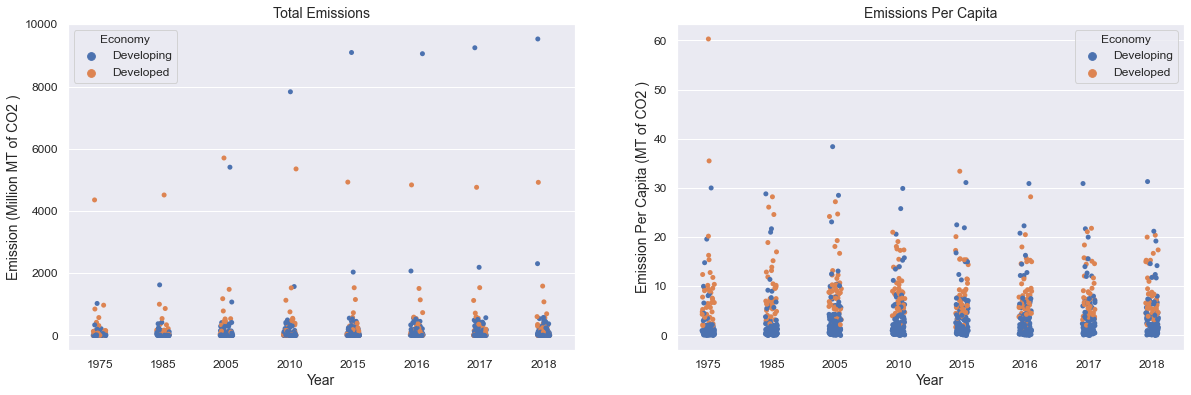

In [91]:
plot_emission_distribution(data)

In [92]:
def get_agg_data_by_year(data):
    agg = { 'Total_Emission': pd.NamedAgg(column= 'Value', aggfunc = 'sum'),
            'Avg_Emission':   pd.NamedAgg(column= 'Value', aggfunc = np.mean) }

    emission_agg_by_year =  data.groupby(['Year', 'Series']).agg(**agg).reset_index() 
    emission_agg_by_year['Year'] = emission_agg_by_year['Year'].apply(str)
    return emission_agg_by_year


In [93]:


def plot_total_emiision_by_year(emission_agg_by_year):
    emission_total     = emission_agg_by_year[emission_agg_by_year.Series== SERIES_TOTAL].copy()
    # Convert to Milllion MT. The orignal valaue is thousand of MT
    emission_total['Total_Emission'] = (emission_total['Total_Emission'] * 1000) / 1000000


    emission_percapita = emission_agg_by_year[emission_agg_by_year.Series== SERIES_PER_CAPITA]



    fig, (ax1, ax2)  =  plt.subplots(ncols = 2, figsize = FIG_SIZE_2)
    s = sns.barplot(ax = ax1, x = 'Year'	, y = "Total_Emission", data = emission_total)
    s.set_title('Total Emissions By Year')
    s.set(ylabel = 'Total Emission (Millions MT of CO2 )')

    s = sns.barplot(ax = ax2, x = 'Year'	, y = "Total_Emission", data = emission_percapita)
    s.set_title('Total Emissions Per Capita By Year')
    s.set(ylabel = 'Total Emission Per Capita (MT of CO2 )')
    plt.show()



### Plot Total Emission By Year for all Countries

* Total emissions for all countries show increasing trend from year 1985 to 2005.  
* Total emission can be seen stabilizing after 2005
* per capita emissions on the other hand shows decreasing trend after 2005 which is a good sign.


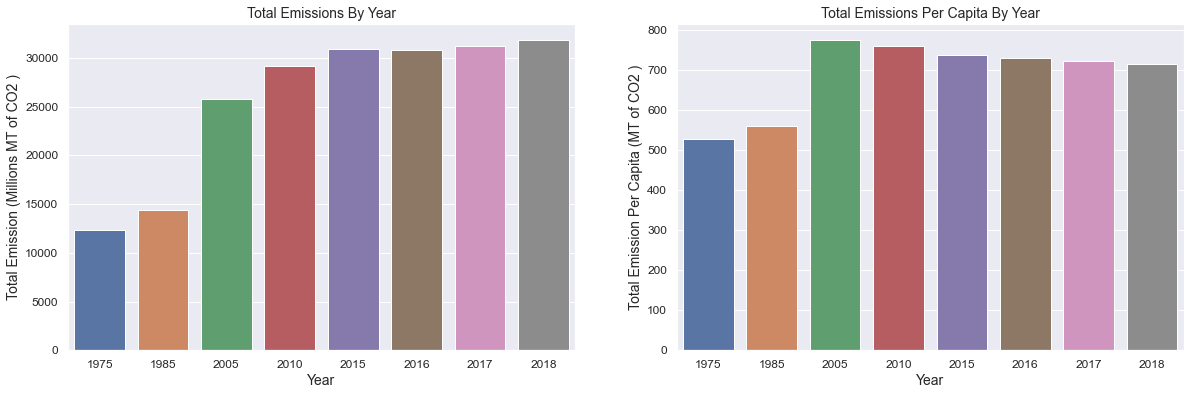

In [94]:
emission_agg_by_year =   get_agg_data_by_year(data)
plot_total_emiision_by_year(emission_agg_by_year)

In [95]:

def plot_average_emission_by_year(emission_agg_by_year):
    emission_total     = emission_agg_by_year[emission_agg_by_year.Series== SERIES_TOTAL].copy()
    # Convert to Milllion MT. The orignal valaue is thousand of MT
    emission_total['Avg_Emission'] = (emission_total['Avg_Emission'] * 1000) / 1000000

    emission_percapita = emission_agg_by_year[emission_agg_by_year.Series== SERIES_PER_CAPITA]

    fig, (ax1, ax2)  =  plt.subplots(ncols = 2, figsize = FIG_SIZE_2)
    s = sns.barplot(ax = ax1, x = 'Year'	, y = "Avg_Emission", data = emission_total)
    s.set_title('Average Emissions By Year')
    s.set(ylabel = 'Average Emission (Million MT of CO2 )')

    s = sns.barplot(ax = ax2, x = 'Year'	, y = "Avg_Emission", data = emission_percapita)
    s.set_title('Average Emissions Per Capita By Year')
    s.set(ylabel = 'Average Emission Per Capita (MT of CO2 )')
    plt.show()

### Plot Average Emission By Year
* The average emissions for all countries show increasing trend from year 1985 to 2005 
* The average emission for all countries has stabilized after 2005 with value around 200 Million MT of CO2.
*  Similarly, per capita emission per country on average is stabilized around 5MT for recent years



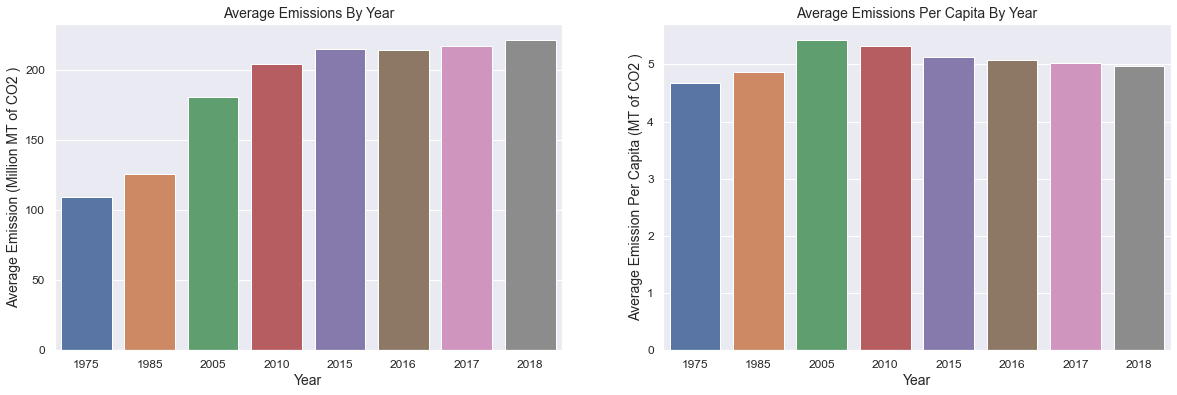

In [96]:
plot_average_emission_by_year(emission_agg_by_year)

In [97]:

def plot_emission_by_econ(data):
    agg = { 'Total_Emission': pd.NamedAgg(column= 'Value', aggfunc = 'sum'),
            'Avg_Emission':  pd.NamedAgg(column= 'Value', aggfunc = np.mean),
            'Count':pd.NamedAgg(column= 'Value', aggfunc = 'count')
            }

    emission_agg_by_econ =  data.groupby(['Economy', 'Year', 'Series']).agg(**agg).reset_index() 

    # year = 2018
    emission_total = emission_agg_by_econ[(emission_agg_by_econ.Series == SERIES_TOTAL) ].copy()
    # Convert to Milllion MT. The orignal valaue is thousand of MT
    emission_total['Total_Emission'] = (emission_total['Total_Emission'] * 1000) / 1000000

    emission_per_capita = emission_agg_by_econ[(emission_agg_by_econ.Series == SERIES_PER_CAPITA)]

    fig, (ax1, ax2)  =  plt.subplots(ncols = 2, figsize = (16, 6))
    s = sns.barplot(ax = ax1, x="Year", y="Total_Emission", hue="Economy", data=emission_total)
    s.set_title('Total Emisions By Development Status')
    s.set(ylabel = 'Total Emission (Million MT of CO2 )')

    s = sns.barplot(ax = ax2,x="Year", y="Avg_Emission", hue="Economy", data=emission_per_capita)
    s.set_title('Avg Per Capita Emission By Development Status')
    s.set(ylabel = 'Avg Per Capita Emissions (MT of CO2 )')
    plt.show()

## Plot Emission By Economic Development

* The Total Emissions declined for Developed Countries while it is increasing for  Developing Countries
*  In Years 1975, 1985, and 2005 Developed Countries contributed to greater share of emissions while from 2010 Onwards  Developing Countries have larger share. This is due to shift in industrialization to Developing Countries as their economies grow and they become manufacturing hubs for global economy

* Per Capita emission for Developed Countries is also declining steadily from 1975 to 2018 while for Developing Countries it has remained constant over recent Years
* In 1975 Per Capita Emissions for Developed Countries was 4.5 times that of  Developing Countries. In 2018 However the Ratio was reduced to 2. 

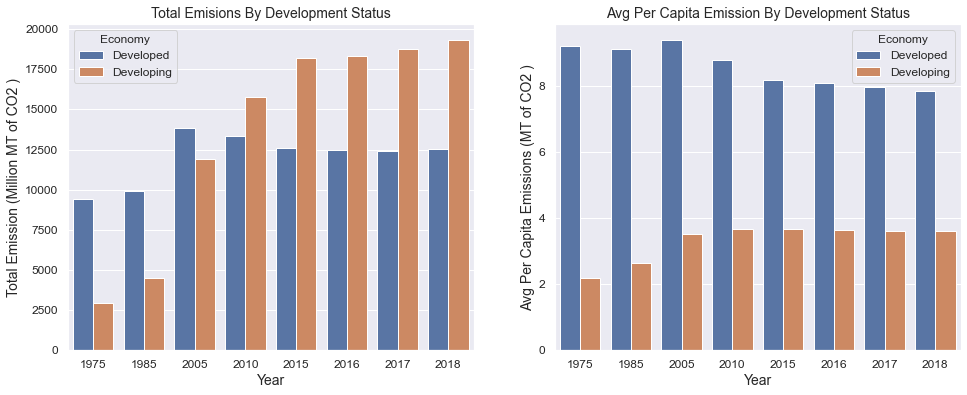

In [98]:

plot_emission_by_econ(data)

In [99]:


def get_total_emission_for_year(data, year):
    emission_total_for_year = data[(data.Series == SERIES_TOTAL) & (data.Year == year)].copy()
    emission_total_for_year = emission_total_for_year.sort_values(by= 'Value', ascending= False)

    # Convert to Milllion MT. The orignal valaue is thousand of MT
    emission_total_for_year['Value'] = (emission_total_for_year['Value'] * 1000) / 1000000
    return emission_total_for_year

def get_per_capita_emission_for_year(data, year):
    emission = data[(data.Series == SERIES_PER_CAPITA) & (data.Year == year)].copy()
    emission = emission.sort_values(by= 'Value', ascending= False)
    return emission



In [100]:


def plot_emissions_by_country_for_a_year(data, year, top_n):

    emission_total_for_year = get_total_emission_for_year(data, year)
    emission_per_capita_for_year = get_per_capita_emission_for_year(data,year)

    emission_top_n = emission_total_for_year[:top_n]
    top_n_emission_perc = emission_top_n.Value.sum()/emission_total_for_year.Value.sum()

    fig, (ax1, ax2)  =  plt.subplots(ncols = 2, figsize = (24,6))
    s = sns.barplot(ax = ax1, y = 'Country'	, x = "Value", data = emission_total_for_year[:top_n],orient = 'h' )
    s.set_title(f'Top {top_n} Emissions producing countries for Year {year} \n Top {top_n} Countries contribute { top_n_emission_perc: .2%} of total emission')
    s.set(xlabel = 'Emission (Million MT of CO2 )')
    s.set(ylabel = 'Country')

    s = sns.barplot(ax = ax2, y = 'Country'	, x = "Value", data = emission_per_capita_for_year[:top_n], orient = 'h' )
    s.set_title(f'Top {top_n} countries with Emissions Per Capita for  Year {year}')
    s.set(xlabel = 'Emission Per Capita (MT of CO2 )')
    s.set(ylabel = 'Country')
    plt.show()

## Plot TOP Emissions Producing Countries 
*  USA, China, Japan , UK were top 4 emission producing countries in 1975, while in 2018 Top 4 List was China, USA, India and Russia. 
 <br> This indicates the shift in emission from developed nations to developing nations
* Top 15 countries were responsible for 83.3% of Total emission in 1975. This declined progressively to 77% in 2018
* Middle East countries have highest emission per capita which is probably due to their fossil fuel based economy 

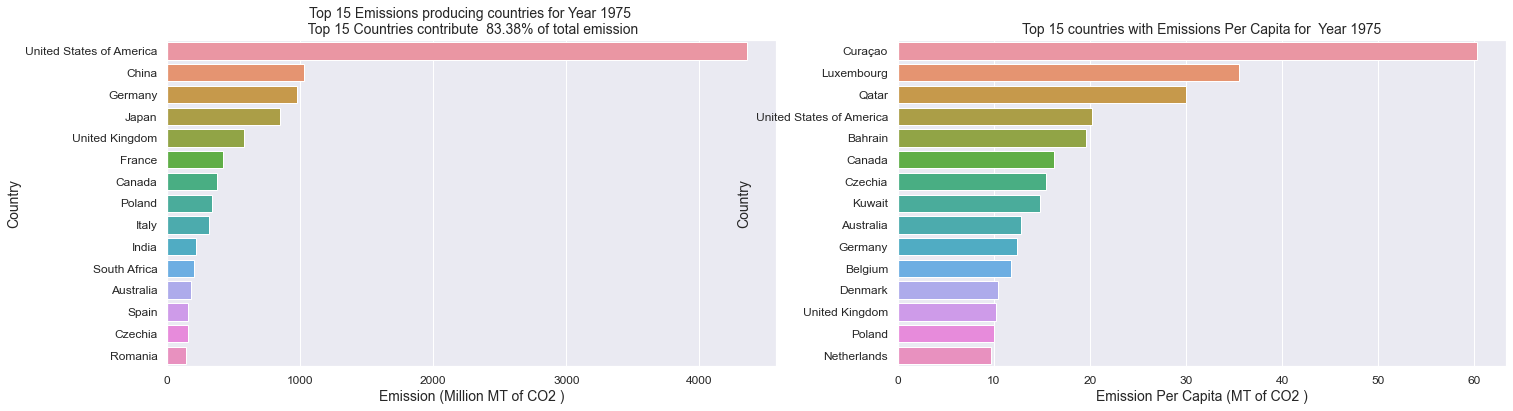

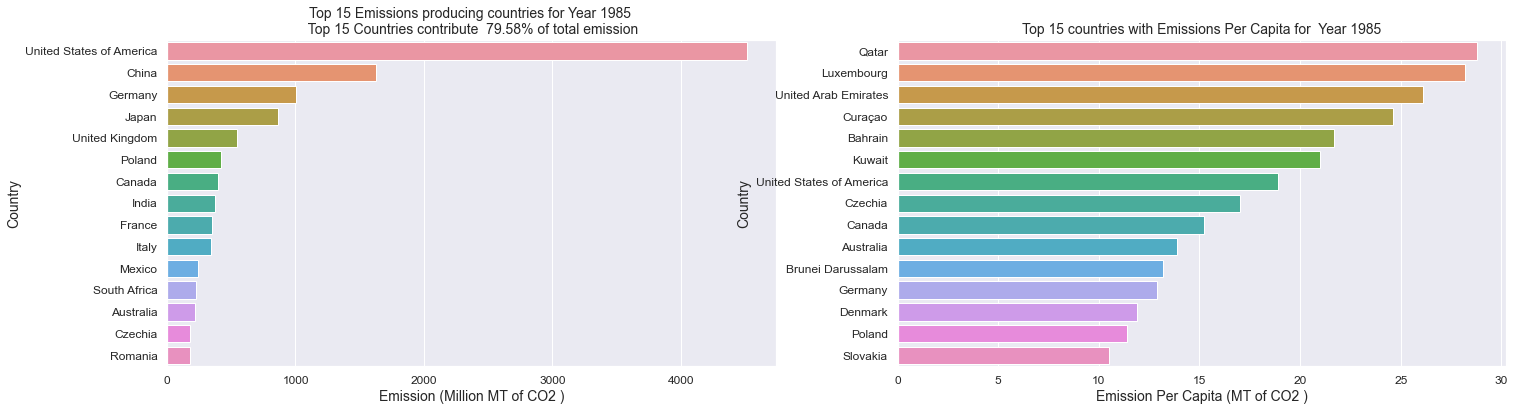

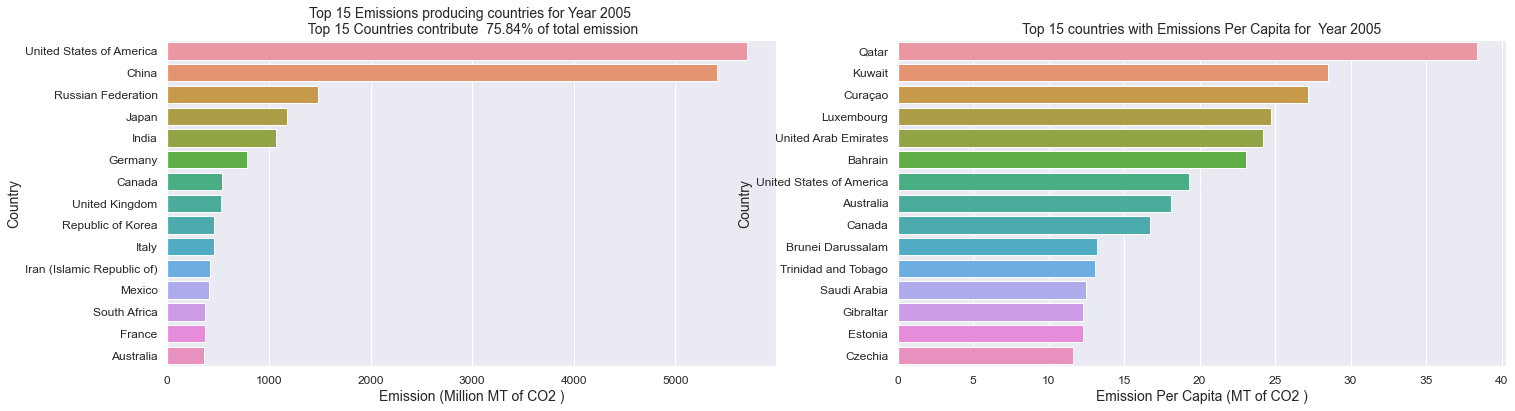

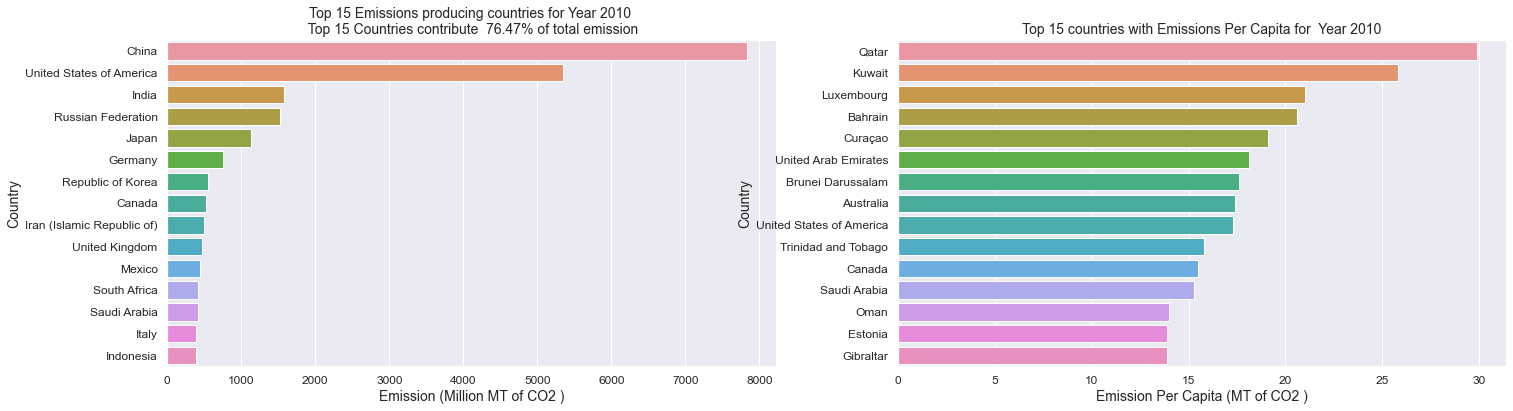

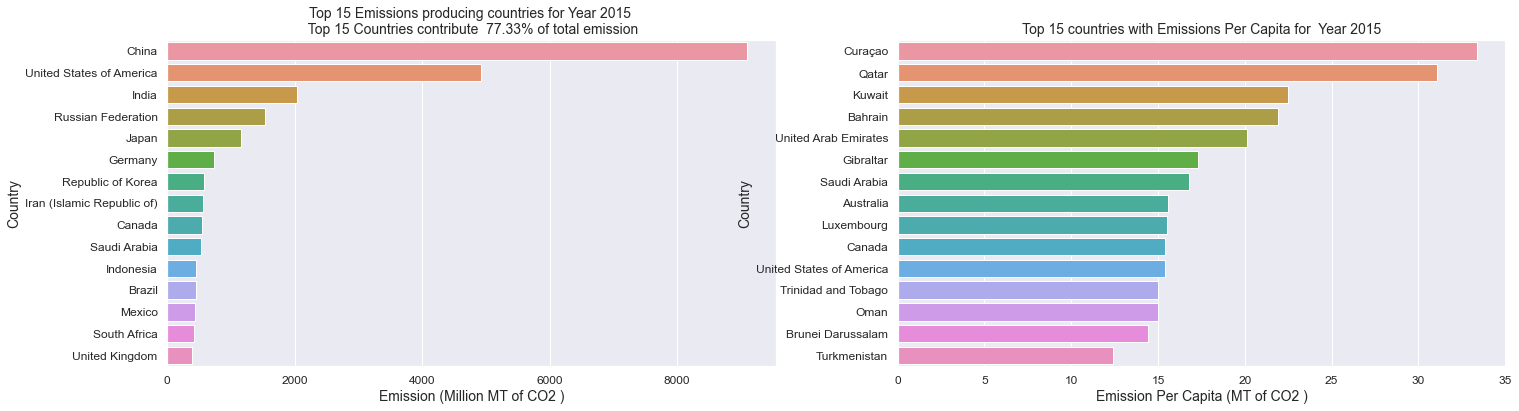

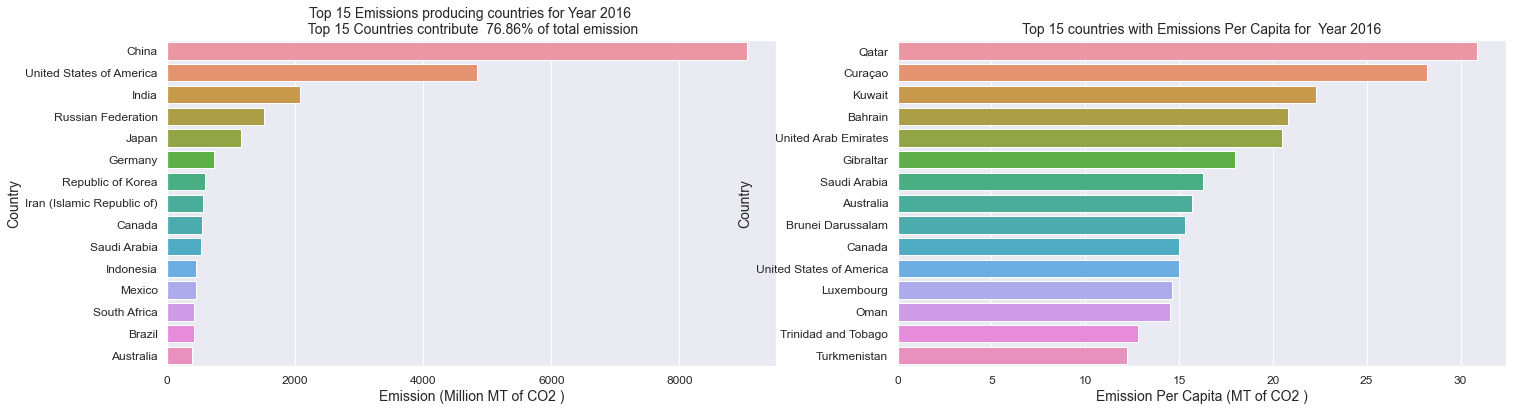

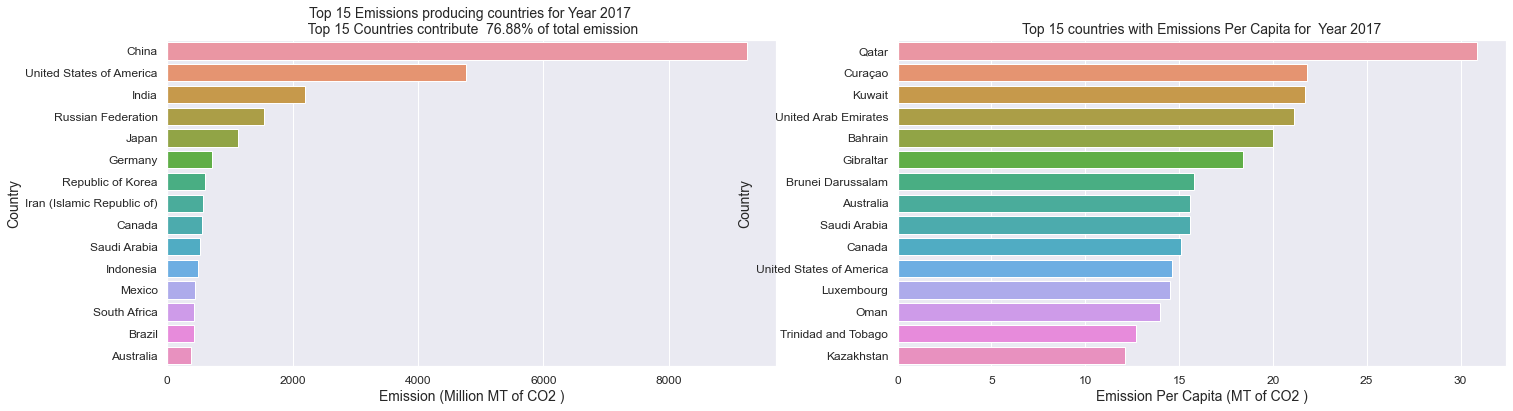

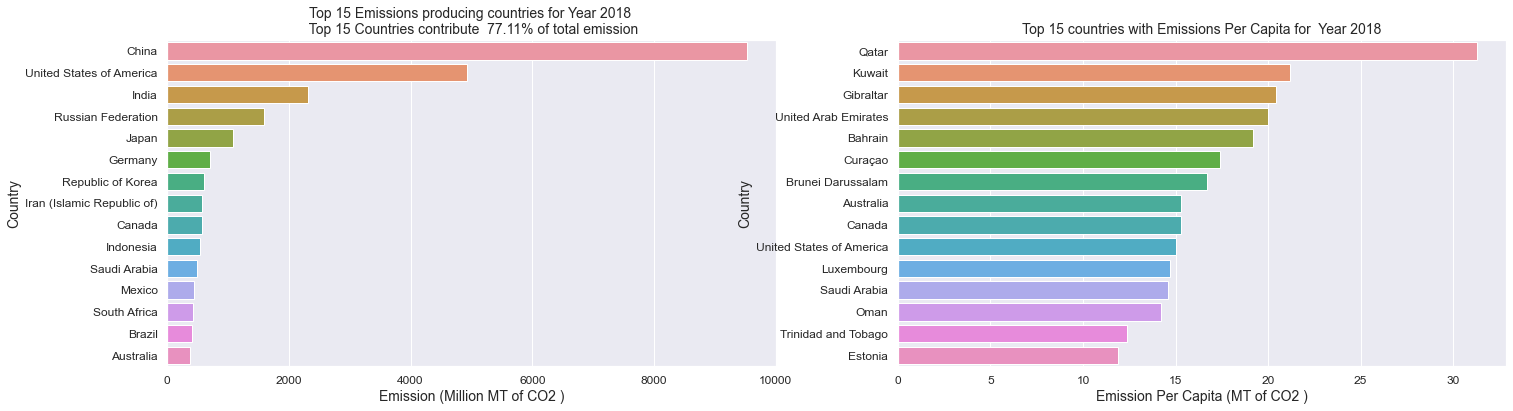

In [101]:

years = list(set(data.Year.to_list()))
years.sort()
top_n = 15

for year in years:
    plot_emissions_by_country_for_a_year(data, year, top_n)

In [102]:


def plot_emissions_for_country(data, country):
    emission_total_country = data[(data.Series == SERIES_TOTAL) & (data.Country == country )].copy()
    # Convert to Milllion MT. The orignal valaue is thousand of MT
    emission_total_country['Value'] = (emission_total_country['Value'] * 1000) / 1000000


    emission_per_capita_country = data[(data.Series == SERIES_PER_CAPITA) & (data.Country == country )].copy()

    fig, (ax1, ax2)  =  plt.subplots(ncols = 2, figsize = (16,4))
    s = sns.barplot(ax = ax1, x = 'Year'	, y = "Value", data = emission_total_country)
    s.set_title(f'Emissions for {country}')
    s.set(ylabel = 'Emission (Million MT of CO2 )')

    s = sns.barplot(ax = ax2, x = 'Year'	, y = "Value", data = emission_per_capita_country)
    s.set_title(f'Emissions Per Capita for {country}')
    s.set(ylabel = 'Emission Per Capita (MT of CO2 )')
    plt.show()

## Plot Emissions Year for a Country
* Showing Emissions only for top 6 countries
* Emissions for China increased till 2015 and stabilized thereafter
* Emissions for USA has shown decline after 2005
* Emissions for India has been ever increasing till 2018

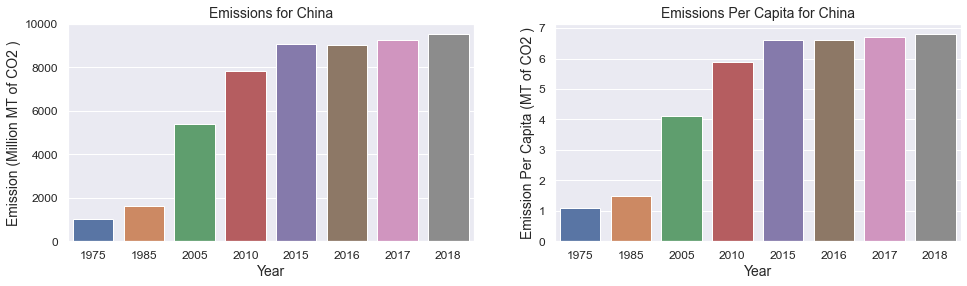

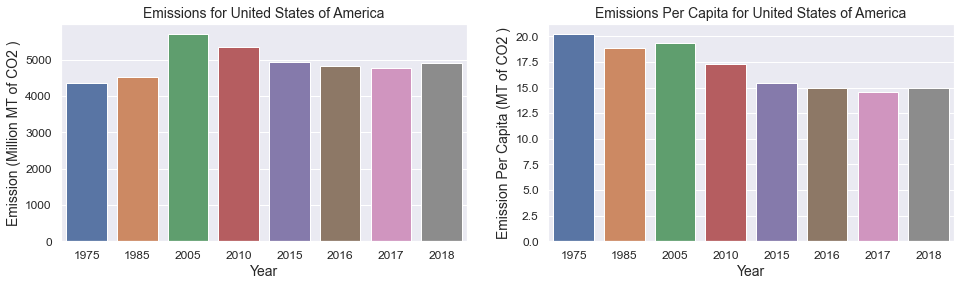

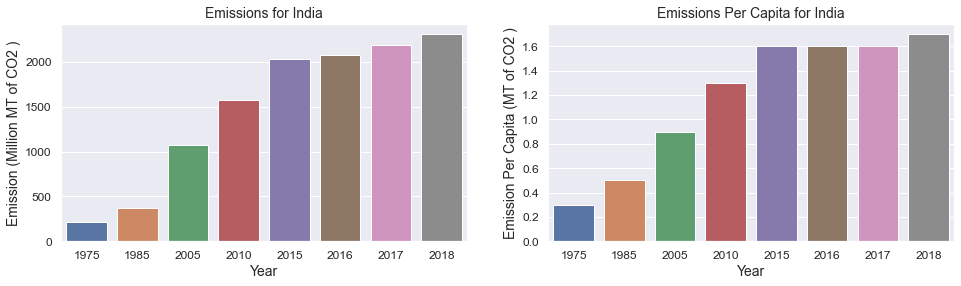

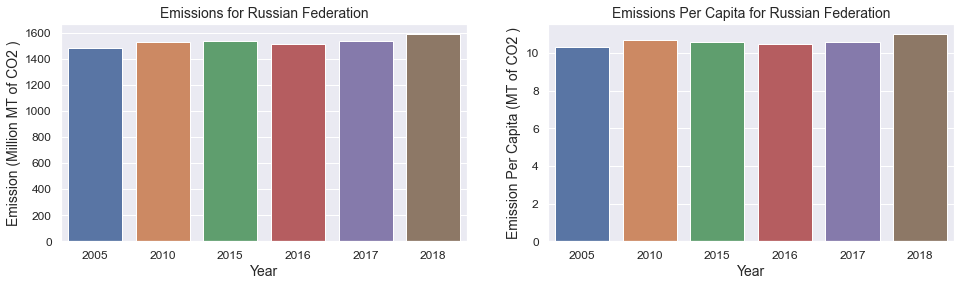

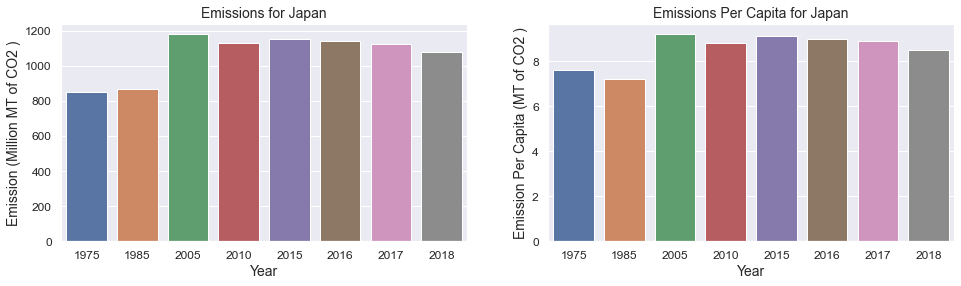

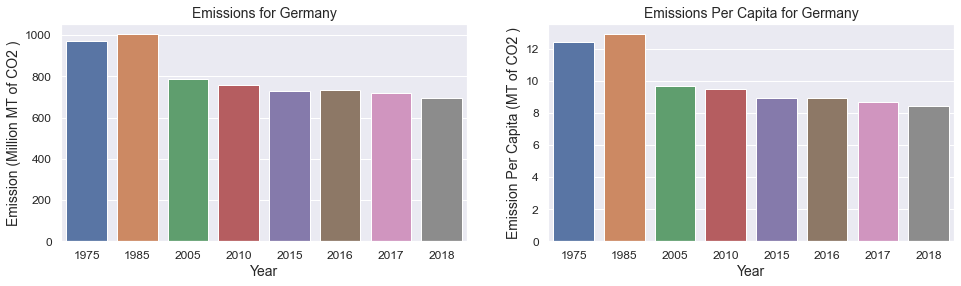

In [103]:
countries = ['China', 'United States of America','India','Russian Federation','Japan', 'Germany']
for country in countries:
    plot_emissions_for_country(data, country)

In [122]:
# data_new = data.pivot(index=['Region',	'Country',	'Year','Economy'], columns='Series', values='Value').reset_index()

# # pivoted.columns.name= ['Total_Emission', 'Per_Capita_Emission']
# data_new = data_new.rename(columns={'Emissions (thousand metric tons of carbon dioxide)':'Total_Emission',
#                                  'Emissions per capita (metric tons of carbon dioxide)': 'Per_Capita_Emission'},
#                                   errors="raise")
# # df.rename(columns={"A": "a", "B": "b", "C": "c"}, errors="raise")
# data_new['Total_Emission'] = (data_new['Total_Emission'] * 1000) / 1000000
# data_new

In [124]:
# year = 2018
# data_new = data_new[data_new.Total_Emission <= 2000]
# data_new = data_new[data_new.Year == year]
# sns.scatterplot(data=data_new, x="Per_Capita_Emission", y="Total_Emission", hue = 'Economy')